# Testing graphical utils

In [1]:
%matplotlib inline
import datetime

from openfisca_matplotlib import graphs

from openfisca_matplotlib.tests.helpers import create_simulation2, create_simulation

## Testing waterfall

/home/benjello/.local/lib/python2.7/site-packages/openfisca_core/simulations.py:212: Warning: The simulation.get_holder method has been deprecated. Please use entity.get_holder instead.
  Warning
/home/benjello/openfisca/openfisca-matplotlib/openfisca_matplotlib/graphs.py:187: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


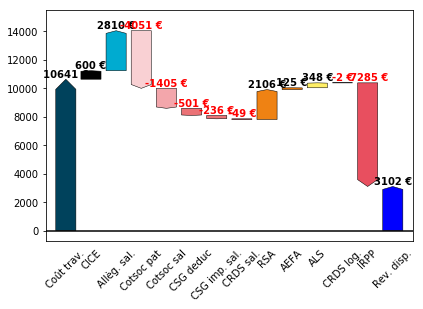

In [2]:
simulation, _ = create_simulation()
year = 2014
simulation.calculate('revenu_disponible', period = year)
graphs.draw_waterfall(
    simulation = simulation,
    visible = ['revenu_disponible'],
    )

## Testing bareme

In [3]:
reform_simulation, reference_simulation = create_simulation(bareme = True)

year = 2014
reference_simulation.calculate('revenu_disponible', period = year)
reform_simulation.calculate('revenu_disponible', period = year)

array([  5320.1646,   5708.506 ,   4989.2275,   4610.7935,   4294.3247,
         3734.0303,   3302.7407,   2964.373 ,   2707.8352,   2617.9932,
         3305.9521,   3993.935 ,   4716.392 ,   5504.3965,   6166.9365,
         7119.334 ,   8142.832 ,   9166.302 ,  10189.778 ,  11213.276 ,
        12236.769 ,  13260.253 ,  14283.759 ,  15307.247 ,  16330.734 ,
        17248.154 ,  18114.78  ,  18981.094 ,  19847.715 ,  20714.041 ,
        21580.64  ,  22447.273 ,  23313.584 ,  24180.205 ,  25046.527 ,
        25913.146 ,  26779.469 ,  27646.074 ,  28512.695 ,  29379.027 ,
        30245.637 ,  31111.95  ,  31978.58  ,  32845.207 ,  33711.51  ,
        34578.13  ,  35444.45  ,  36311.08  ,  37177.4   ,  38044.01  ,
        38910.617 ,  39776.95  ,  40643.57  ,  41509.883 ,  42376.504 ,
        43243.113 ,  44109.43  ,  44976.06  ,  45842.4   ,  46708.992 ,
        47575.31  ,  48441.94  ,  49308.55  ,  50174.867 ,  51041.492 ,
        51846.723 ,  52590.043 ,  53333.387 ,  54076.31  ,  5481

### Reference (baseline) simulation

/home/benjello/openfisca/openfisca-matplotlib/openfisca_matplotlib/graphs.py:233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  axes.hold(True)


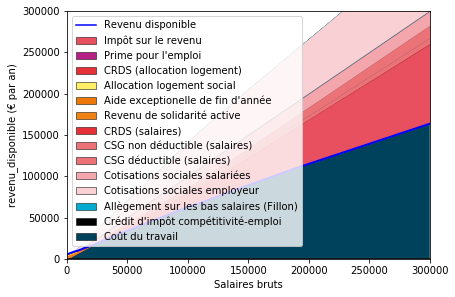

In [4]:
graphs.draw_bareme(
    simulation = reference_simulation,
    x_axis = 'salaire_brut',  # instead of salaire_de_base
    visible_lines = ['revenu_disponible'])

###  Reform simulation

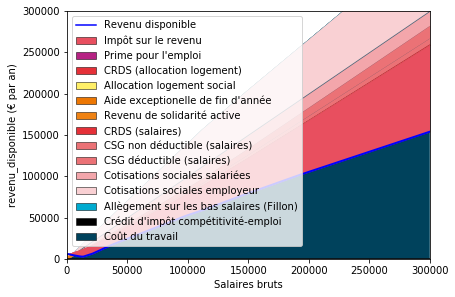

In [5]:
graphs.draw_bareme(
    simulation = reform_simulation,
    x_axis = 'salaire_brut',  # instead of salaire_de_base
    visible_lines = ['revenu_disponible'])

### Difference reform - reference

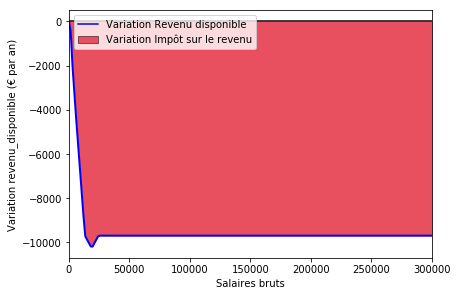

In [6]:
graphs.draw_bareme(
    simulation = reform_simulation,
    reference_simulation = reference_simulation,
    x_axis = 'salaire_brut',  # instead of salaire_de_base
    visible_lines = ['revenu_disponible'])

## Graph rates

/home/benjello/openfisca/openfisca-matplotlib/openfisca_matplotlib/graphs.py:99: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  axes.hold(True)


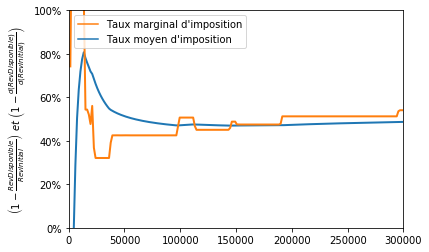

In [7]:
reform_simulation, reference_simulation = create_simulation(bareme = True)
graphs.draw_rates(
    simulation = reform_simulation,
    x_axis = 'salaire_de_base',
    y_axis = 'revenu_disponible',
    period = year,
    )

## Compare household differing in composition

Compare a single with a married individual (spouse is a wage earner) 

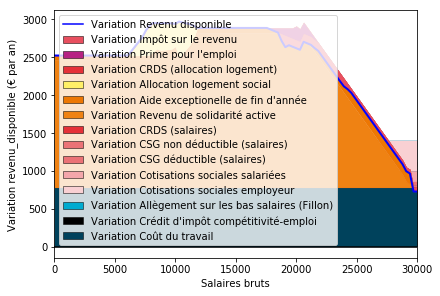

In [8]:
simulation_1p, simulation_2p = create_simulation2(bareme = True)
year = 2014
simulation_1p.calculate('revenu_disponible', period = year)
simulation_2p.calculate('revenu_disponible', period = year)
graphs.draw_bareme(
    simulation = simulation_2p,
    x_axis = 'salaire_brut',  # instead of salaire_de_base
    reference_simulation = simulation_1p,
    visible_lines = ['revenu_disponible'],
    )